IMPORTS, OPTIONS SETTING & DATA READING.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.cm as cm
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df= pd.read_csv('zomato.csv')
df_copy= df.copy()
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


DATA PREPROCESSING

In [3]:
print("The shape of the dataframe is: ")
df.shape

The shape of the dataframe is: 


(51717, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
print('Number of DUPLICATE values: ')
df.duplicated().sum()

Number of DUPLICATE values: 


0

In [6]:
print('Number of NULL values per column: ')
df.isnull().sum()

Number of NULL values per column: 


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.dropna(subset= ['location', 'rest_type', 'cuisines', 'approx_cost(for two people)'], inplace= True)

In [8]:
print('Number of NULL values per column: ')
df.isnull().sum()

Number of NULL values per column: 


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7615
votes                              0
phone                            869
location                           0
rest_type                          0
dish_liked                     27713
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

FEATURE ENGINEERING

In [9]:
to_drop= ['url', 'address', 'rate', 'phone', 'dish_liked', 'cuisines', 'menu_item', 'listed_in(city)', 'reviews_list', 'name', 'rest_type']
cat_val= ['online_order', 'book_table', 'listed_in(type)', 'location']
check_for_object= ['votes', 'approx_cost(for two people)']


In [10]:
df.drop(to_drop, axis= 1, inplace= True)

In [11]:
print('The new shape of the DataFrame is: ')
df.shape

The new shape of the DataFrame is: 


(51148, 6)

In [12]:
for i in df['listed_in(type)'].unique():
    print(i)

Buffet
Cafes
Delivery
Desserts
Dine-out
Drinks & nightlife
Pubs and bars


In [13]:
for i in df['online_order'].unique():
    print(i)

Yes
No


In [14]:
for i in df['book_table'].unique():
    print(i)

Yes
No


In [15]:
for i in df['location'].unique():
    print(i)

Banashankari
Basavanagudi
Mysore Road
Jayanagar
Kumaraswamy Layout
Rajarajeshwari Nagar
Vijay Nagar
Uttarahalli
JP Nagar
South Bangalore
City Market
Nagarbhavi
Bannerghatta Road
BTM
Kanakapura Road
Bommanahalli
CV Raman Nagar
Electronic City
HSR
Marathahalli
Wilson Garden
Shanti Nagar
Koramangala 5th Block
Koramangala 8th Block
Richmond Road
Koramangala 7th Block
Jalahalli
Koramangala 4th Block
Bellandur
Sarjapur Road
Whitefield
East Bangalore
Old Airport Road
Indiranagar
Koramangala 1st Block
Frazer Town
RT Nagar
MG Road
Brigade Road
Lavelle Road
Church Street
Ulsoor
Residency Road
Shivajinagar
Infantry Road
St. Marks Road
Cunningham Road
Race Course Road
Commercial Street
Vasanth Nagar
HBR Layout
Domlur
Ejipura
Jeevan Bhima Nagar
Old Madras Road
Malleshwaram
Seshadripuram
Kammanahalli
Koramangala 6th Block
Majestic
Langford Town
Central Bangalore
Sanjay Nagar
Brookefield
ITPL Main Road, Whitefield
Varthur Main Road, Whitefield
KR Puram
Koramangala 2nd Block
Koramangala 3rd Block
Kora

In [16]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

df.drop('approx_cost(for two people)', axis= 1, inplace= True)
df['approx_cost'].isnull().sum()


0

LABEL ENCODING

In [17]:
df['online_order']= LabelEncoder().fit_transform(df['online_order'])
df['book_table']= LabelEncoder().fit_transform(df['book_table'])
df['location']= LabelEncoder().fit_transform(df['location'])
df['listed_in(type)']= LabelEncoder().fit_transform(df['listed_in(type)'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51148 entries, 0 to 51716
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   online_order     51148 non-null  int32
 1   book_table       51148 non-null  int32
 2   votes            51148 non-null  int64
 3   location         51148 non-null  int32
 4   listed_in(type)  51148 non-null  int32
 5   approx_cost      51148 non-null  int64
dtypes: int32(4), int64(2)
memory usage: 2.0 MB


OUTLIER DETECTION

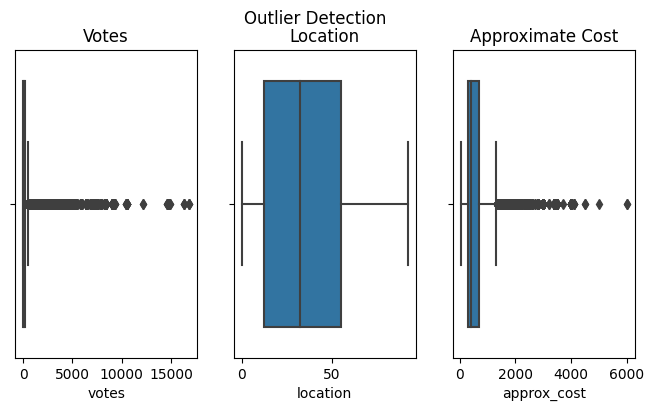

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

sns.boxplot(data=df, x='votes', ax=axes[0])
axes[0].set_title('Votes')

sns.boxplot(data=df, x='location', ax=axes[1])
axes[1].set_title('Location')

sns.boxplot(data=df, x='approx_cost', ax=axes[2])
axes[2].set_title('Approximate Cost')

fig.suptitle('Outlier Detection')

plt.show()


In [20]:
df= df[df['votes'] < 10000]
df= df[df['approx_cost'] < 4000]

In [21]:
print("The new shape of the dataframe is: ")
df.shape

The new shape of the dataframe is: 


(51072, 6)

DESCRIPTIVE STATISTICS

In [22]:
df.describe()

,online_order,book_table,votes,location,listed_in(type),approx_cost
count,51072.000000,51072.000000,51072.000000,51072.000000,51072.000000,51072.000000
mean,0.593378,0.125255,275.144052,35.993773,2.806646,552.839619
std,0.491208,0.331011,720.100276,27.185378,1.139517,428.006176
min,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,0.000000,0.000000,7.000000,12.000000,2.000000,300.000000
50%,1.000000,0.000000,41.000000,32.000000,2.000000,400.000000
75%,1.000000,0.000000,198.000000,55.000000,4.000000,650.000000
max,1.000000,1.000000,9300.000000,92.000000,6.000000,3700.000000


DATA VISUALIZATION

c:\Users\manan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


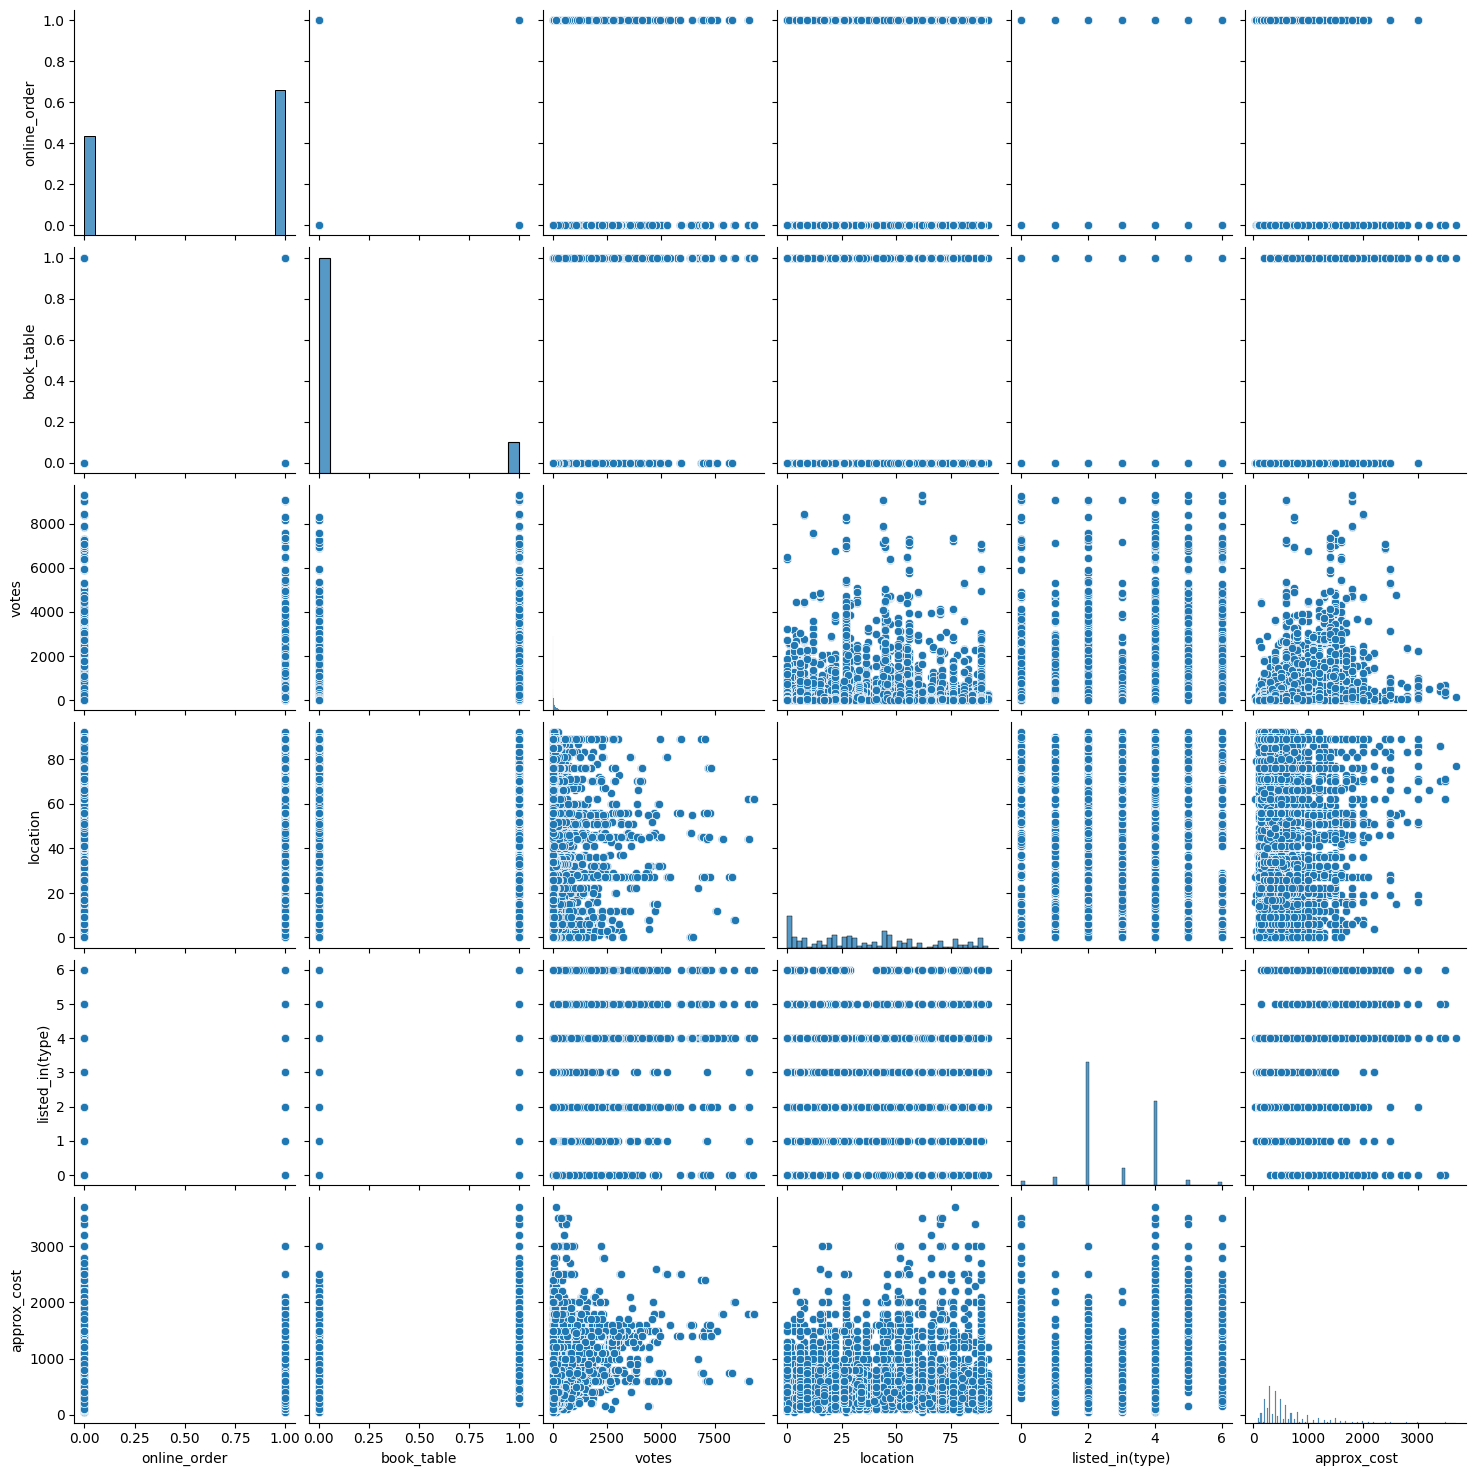

In [23]:
sns.pairplot(df)

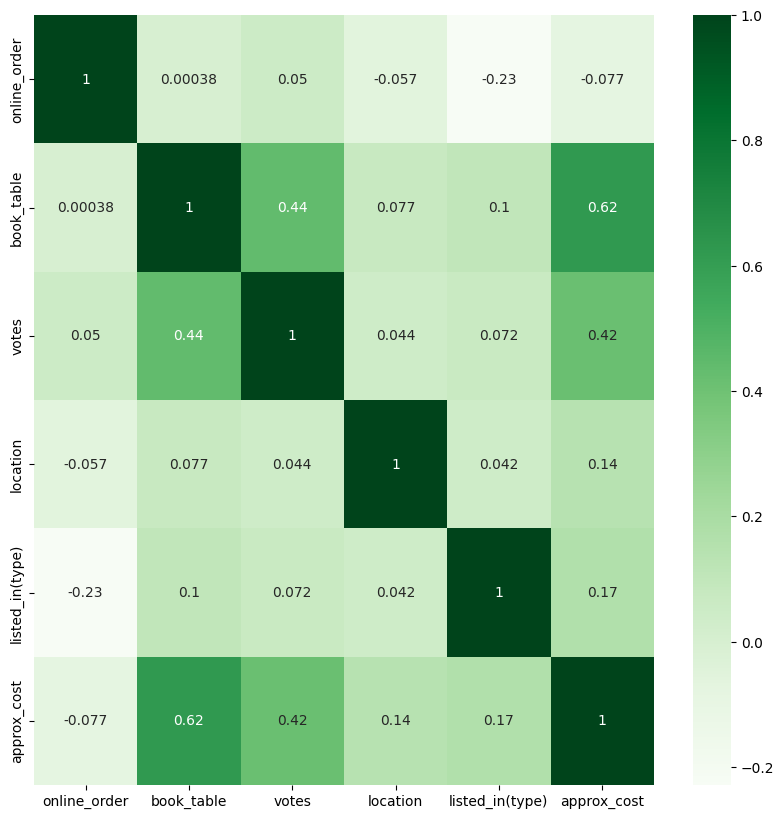

In [24]:
fig =plt.figure(figsize= (10, 10))
sns.heatmap(df.corr(), cmap= 'Greens', annot= True)
plt.show()

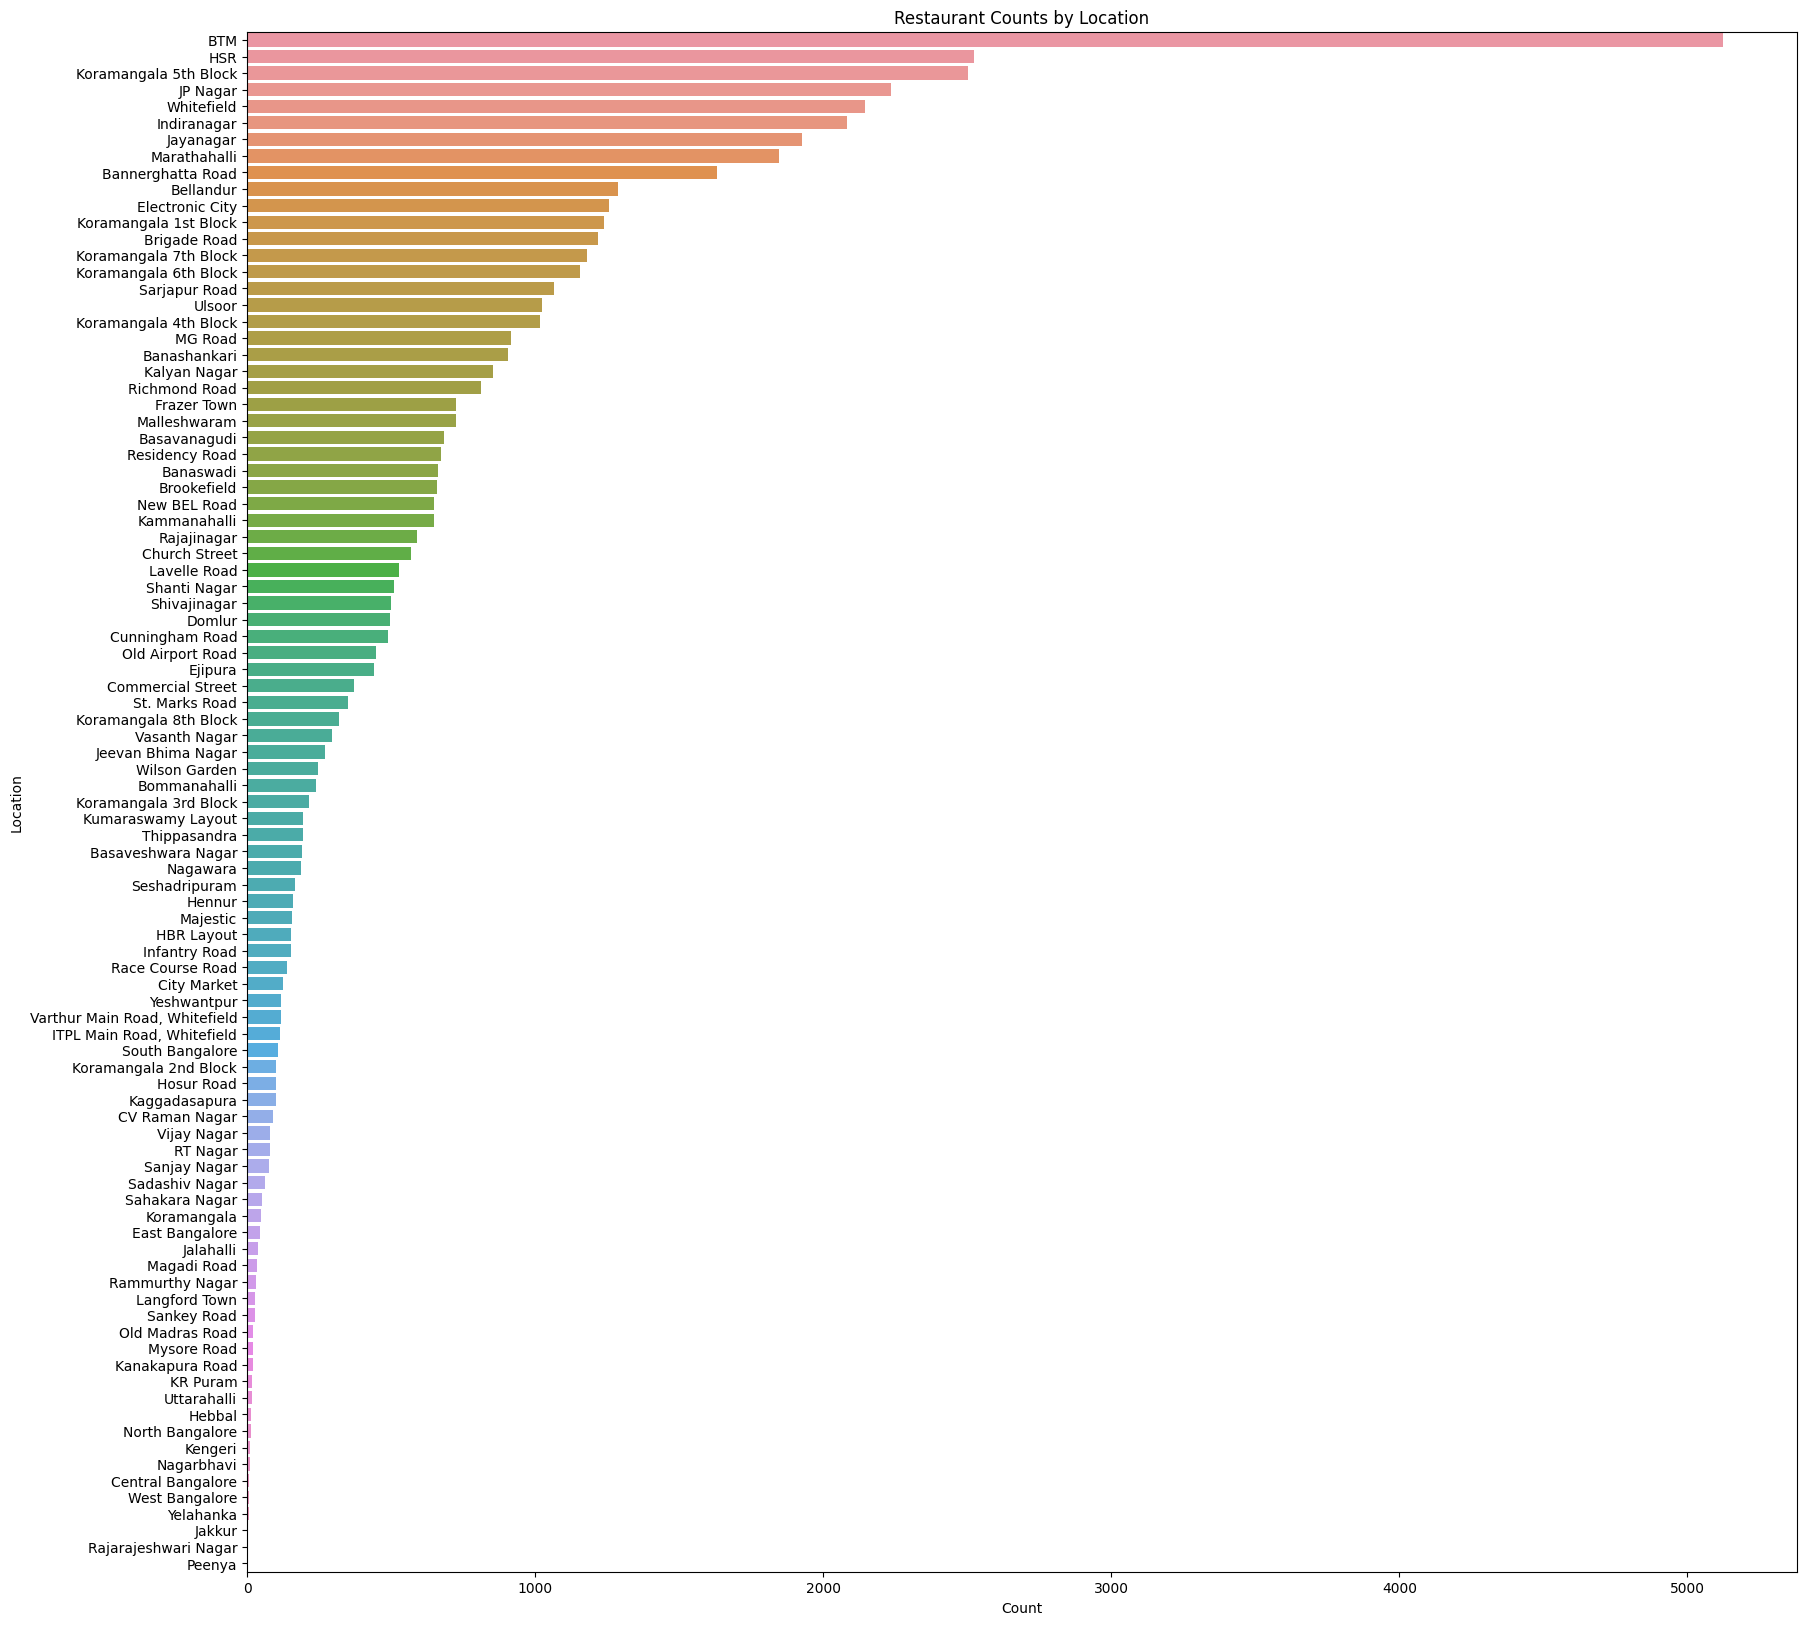

In [25]:
plt.figure(figsize=(20, 20))
sns.countplot(y='location', data=df_copy, order = df_copy['location'].value_counts().index)
plt.title('Restaurant Counts by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

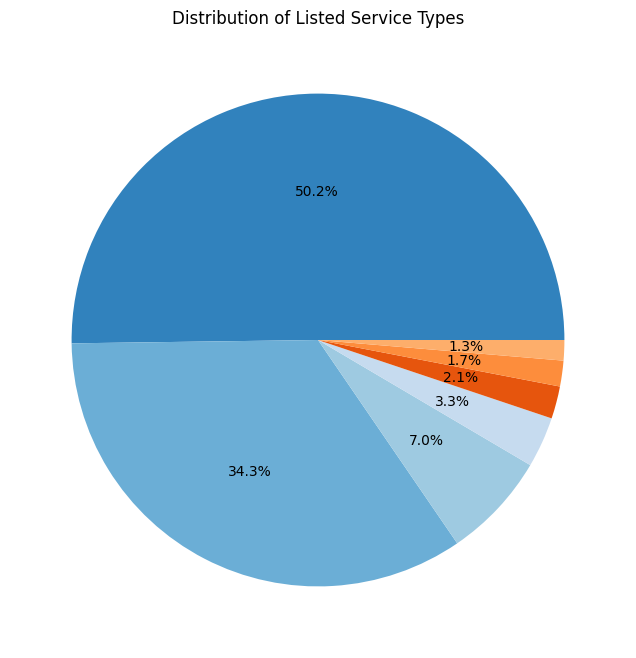

In [26]:

plt.figure(figsize=(8, 8))
service_type_counts = df['listed_in(type)'].value_counts()
plt.pie(service_type_counts, autopct='%1.1f%%', colors=plt.cm.tab20c.colors)
plt.title('Distribution of Listed Service Types')
plt.show()


In [27]:
df.columns

Index(['online_order', 'book_table', 'votes', 'location', 'listed_in(type)',
       'approx_cost'],
      dtype='object')

TRAIN TEST SPLIT

In [28]:
X= df.drop('approx_cost', axis= 1)
y= df['approx_cost']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [29]:
'''param_grid_lr = {
    'fit_intercept': [True, False]
}

grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X, y)

best_params_lr= grid_search_lr.best_params_
print(grid_search_lr.best_params_)

joblib.dump(best_params_lr, 'params_lr.pkl')
joblib.dump(grid_search_lr, 'grid_lr.pkl')'''

"param_grid_lr = {\n    'fit_intercept': [True, False]\n}\n\ngrid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')\ngrid_search_lr.fit(X, y)\n\nbest_params_lr= grid_search_lr.best_params_\nprint(grid_search_lr.best_params_)\n\njoblib.dump(best_params_lr, 'params_lr.pkl')\njoblib.dump(grid_search_lr, 'grid_lr.pkl')"

In [30]:
best_params_lr= joblib.load('params_lr.pkl')
grid_search_lr= joblib.load('grid_lr.pkl')

In [31]:
'''param_grid_en = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],
    'fit_intercept': [True, False]
}

grid_search_en = GridSearchCV(ElasticNet(), param_grid_en, cv=5, scoring='neg_mean_squared_error')
grid_search_en.fit(X, y)

best_params_en= grid_search_en.best_params_
print(grid_search_en.best_params_)

joblib.dump(best_params_en, 'params_en.pkl')
joblib.dump(grid_search_en, 'grid_en.pkl')'''

"param_grid_en = {\n    'alpha': [0.1, 1.0, 10.0, 100.0],\n    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],\n    'fit_intercept': [True, False]\n}\n\ngrid_search_en = GridSearchCV(ElasticNet(), param_grid_en, cv=5, scoring='neg_mean_squared_error')\ngrid_search_en.fit(X, y)\n\nbest_params_en= grid_search_en.best_params_\nprint(grid_search_en.best_params_)\n\njoblib.dump(best_params_en, 'params_en.pkl')\njoblib.dump(grid_search_en, 'grid_en.pkl')"

In [32]:
best_params_en= joblib.load('params_en.pkl')
grid_search_en= joblib.load('grid_en.pkl')

In [33]:
'''param_grid_dt = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X, y)

best_params_dt= grid_search_dt.best_params_
print(grid_search_dt.best_params_)

joblib.dump(best_params_dt, 'params_dt.pkl')
joblib.dump(grid_search_dt, 'grid_dt.pkl')'''

"param_grid_dt = {\n    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],\n    'splitter': ['best', 'random'],\n    'max_depth': [None, 10, 20, 30, 40, 50],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n}\n\ngrid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error')\ngrid_search_dt.fit(X, y)\n\nbest_params_dt= grid_search_dt.best_params_\nprint(grid_search_dt.best_params_)\n\njoblib.dump(best_params_dt, 'params_dt.pkl')\njoblib.dump(grid_search_dt, 'grid_dt.pkl')"

In [34]:
best_params_dt= joblib.load('params_dt.pkl')
grid_search_dt =joblib.load('grid_dt.pkl')

In [35]:
'''param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X, y)

best_params_rf= grid_search_rf.best_params_
print(grid_search_rf.best_params_)

joblib.dump(best_params_rf, 'params_rf.pkl')
joblib.dump(grid_search_rf, 'grid_rf.pkl')'''

"param_grid_rf = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n}\n\ngrid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')\ngrid_search_rf.fit(X, y)\n\nbest_params_rf= grid_search_rf.best_params_\nprint(grid_search_rf.best_params_)\n\njoblib.dump(best_params_rf, 'params_rf.pkl')\njoblib.dump(grid_search_rf, 'grid_rf.pkl')"

In [36]:
best_params_rf= joblib.load('params_rf.pkl')
grid_search_rf =joblib.load('grid_rf.pkl')

In [37]:
best_lr = grid_search_lr.best_estimator_
best_en = grid_search_en.best_estimator_
best_dt = grid_search_dt.best_estimator_
best_rf = grid_search_rf.best_estimator_

In [38]:
y_pred_lr = best_lr.predict(X_test)
y_pred_en = best_en.predict(X_test)
y_pred_dt = best_dt.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

In [39]:
results=pd.DataFrame({"y_actual":y_test,
               "y_pred_linear":y_pred_lr,
               "y_pred_elasticNET":y_pred_en,
               "y_pred_randomForest":y_pred_dt,
                      "y_pred_XGBOOST":y_pred_rf
                     })
results


,y_actual,y_pred_linear,y_pred_elasticNET,y_pred_randomForest,y_pred_XGBOOST
43857,3000,1317.866180,1316.704967,3000.000000,2986.666667
30571,100,421.162381,421.001427,241.935484,241.979830
43232,600,480.243687,480.497678,600.000000,597.875000
18718,900,498.320172,498.652212,900.000000,859.757576
40719,500,477.065098,476.952116,550.000000,534.580159
...,...,...,...,...,...
43950,1100,1295.902673,1294.719697,1100.000000,1140.333333
30371,300,341.369210,341.583218,325.244300,324.362119
45665,120,542.733210,542.591079,266.896552,267.065591
7873,250,414.190070,414.384190,367.000000,368.260608


In [40]:
print('LinearRegression')
mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred_lr)
print(f"R-Squared (R2 Score): {r2}")

LinearRegression
Mean Absolute Error (MAE): 217.83920180051746
Mean Squared Error (MSE): 103887.81349110286
Root Mean Squared Error (RMSE): 322.31632520104046
R-Squared (R2 Score): 0.43561257164832234


In [41]:
print('ElasticNet')
mae = mean_absolute_error(y_test, y_pred_en)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred_en)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred_en)
print(f"R-Squared (R2 Score): {r2}")

ElasticNet
Mean Absolute Error (MAE): 217.81189950088068
Mean Squared Error (MSE): 103889.04683304636
Root Mean Squared Error (RMSE): 322.3182384430741
R-Squared (R2 Score): 0.4356058713177987


In [42]:
print('DecisionTree')
mae = mean_absolute_error(y_test, y_pred_dt)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred_dt)
print(f"R-Squared (R2 Score): {r2}")

DecisionTree
Mean Absolute Error (MAE): 64.97439674741119
Mean Squared Error (MSE): 14442.773727493208
Root Mean Squared Error (RMSE): 120.17809171181413
R-Squared (R2 Score): 0.9215372848036391


In [43]:
print('RandomForest')
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred_rf)
print(f"R-Squared (R2 Score): {r2}")

RandomForest
Mean Absolute Error (MAE): 64.85951558178468
Mean Squared Error (MSE): 12673.779941416758
Root Mean Squared Error (RMSE): 112.57788389118335
R-Squared (R2 Score): 0.9311476310044404


In [44]:
df

,online_order,book_table,votes,location,listed_in(type),approx_cost
0,1,1,775,1,0,800
1,1,0,787,1,0,800
2,1,0,918,1,0,800
3,0,0,88,1,0,300
4,0,0,166,4,0,600
...,...,...,...,...,...,...
51712,0,0,27,89,6,1500
51713,0,0,0,89,6,600
51714,0,0,0,89,6,2000
51715,0,1,236,26,6,2500


C:\Users\manan\AppData\Local\Temp\ipykernel_8420\2874248175.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color='green', lw= 1)


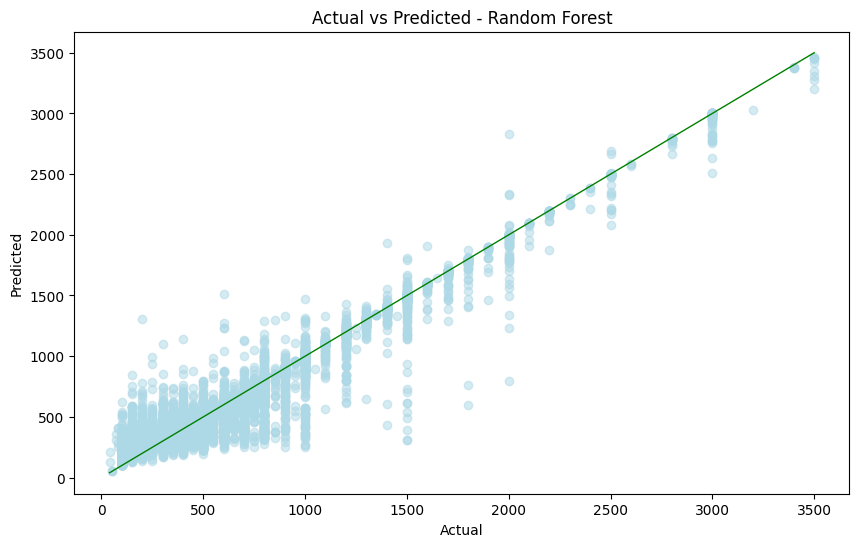

In [64]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color= 'lightblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color='green', lw= 1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Random Forest')
plt.show()
